# House Prices - Advanced Regression Techniques (Kaggle)

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
df_train=pd.read_csv('data/train.csv')
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [146]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: xlabel='SalePrice', ylabel='Count'>

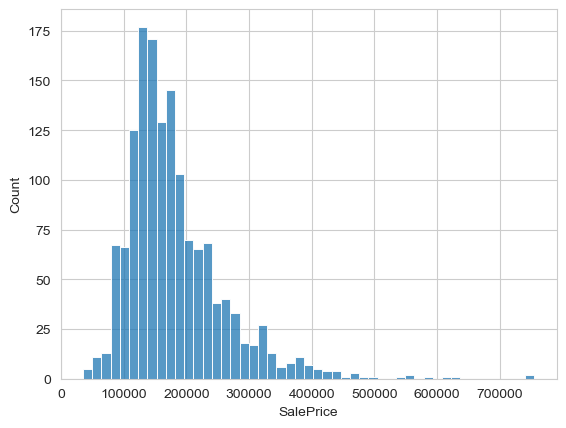

In [147]:
sns.histplot(data=df_train, x='SalePrice')

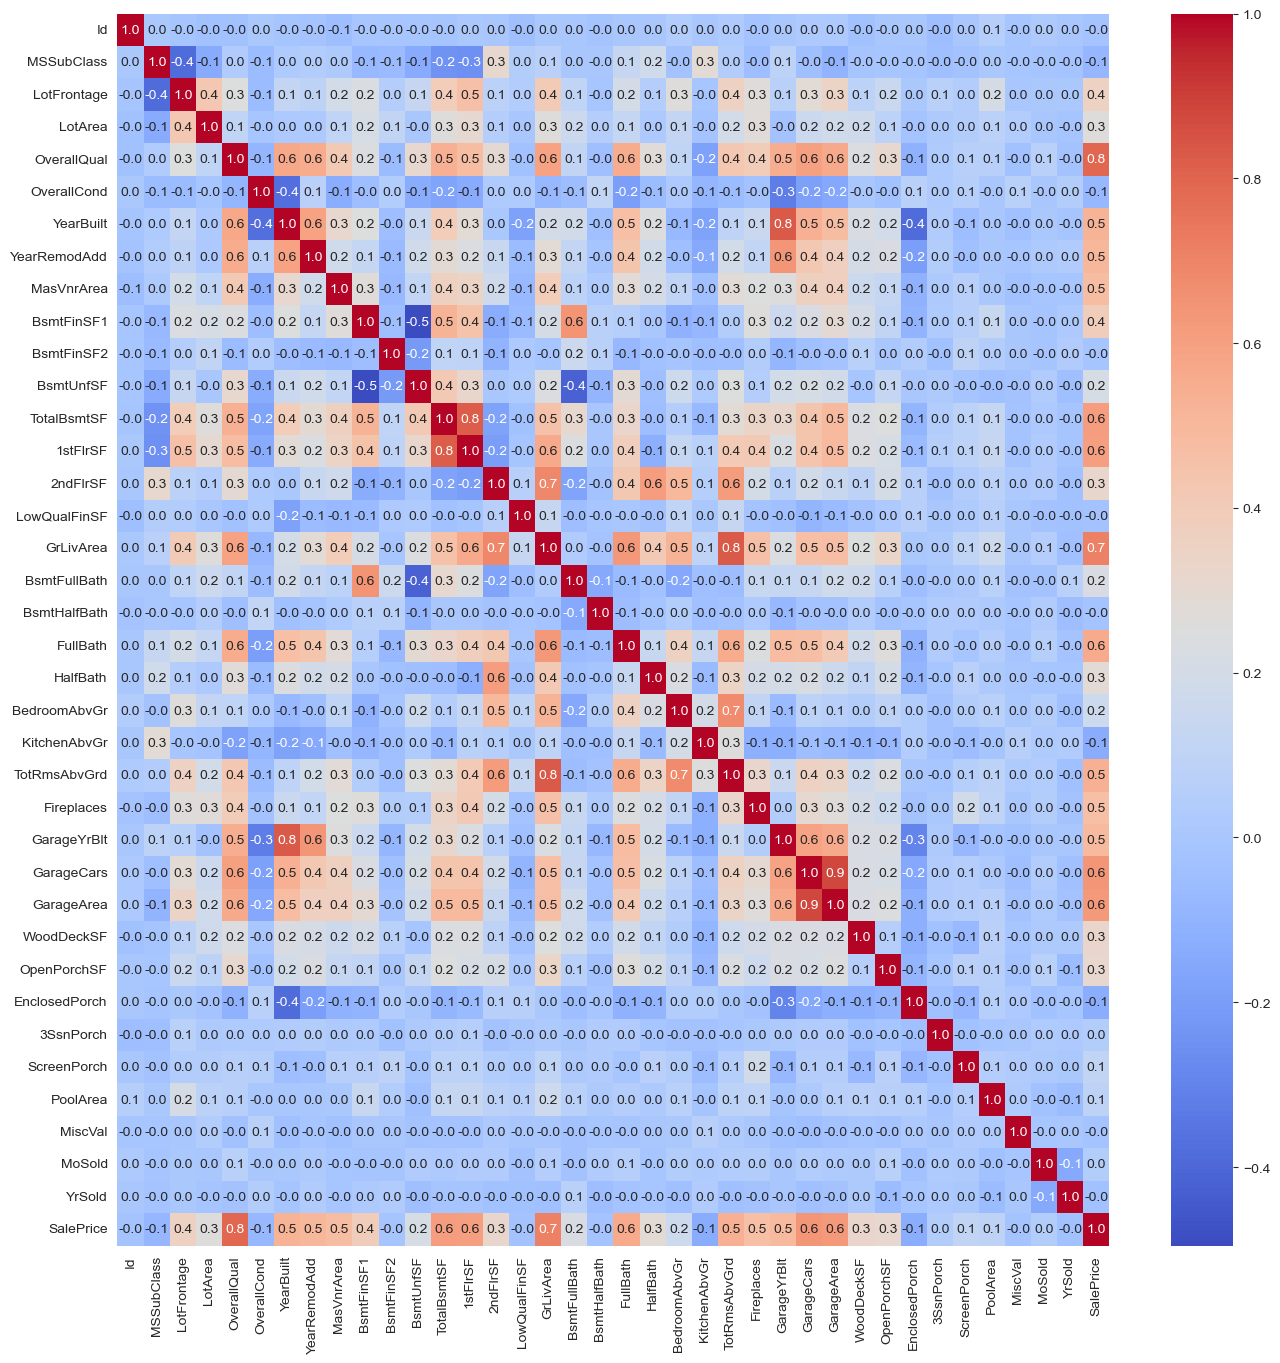

In [148]:
df_train_num=df_train.select_dtypes(include=np.number)

correlation_matrix=df_train_num.corr()
plt.figure(figsize=(16,16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f');

In [149]:
correlation_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<Figure size 640x480 with 0 Axes>

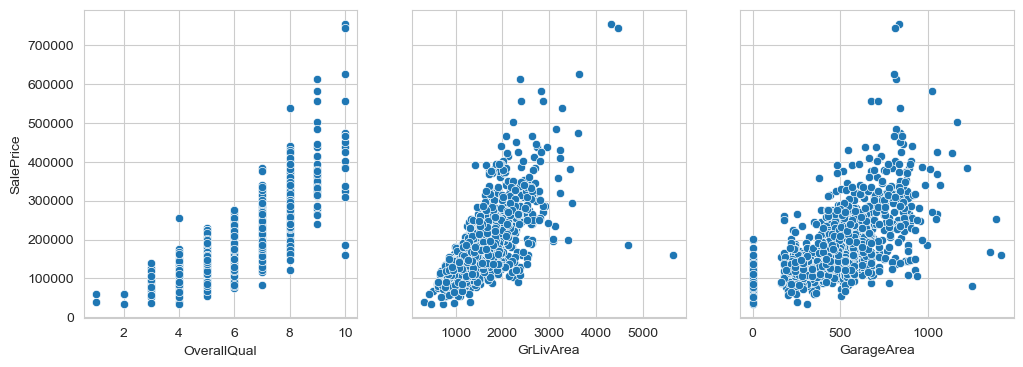

In [150]:
plt.tight_layout()

sns.set_style('whitegrid')

fig, axes = plt.subplots(1,3, figsize=(12,4), sharey=True);


sns.scatterplot(data=df_train, x='OverallQual', y='SalePrice', ax=axes[0]);

sns.scatterplot(data=df_train, x='GrLivArea', y='SalePrice', ax=axes[1]);

sns.scatterplot(data=df_train, x='GarageArea', y='SalePrice', ax=axes[2]);



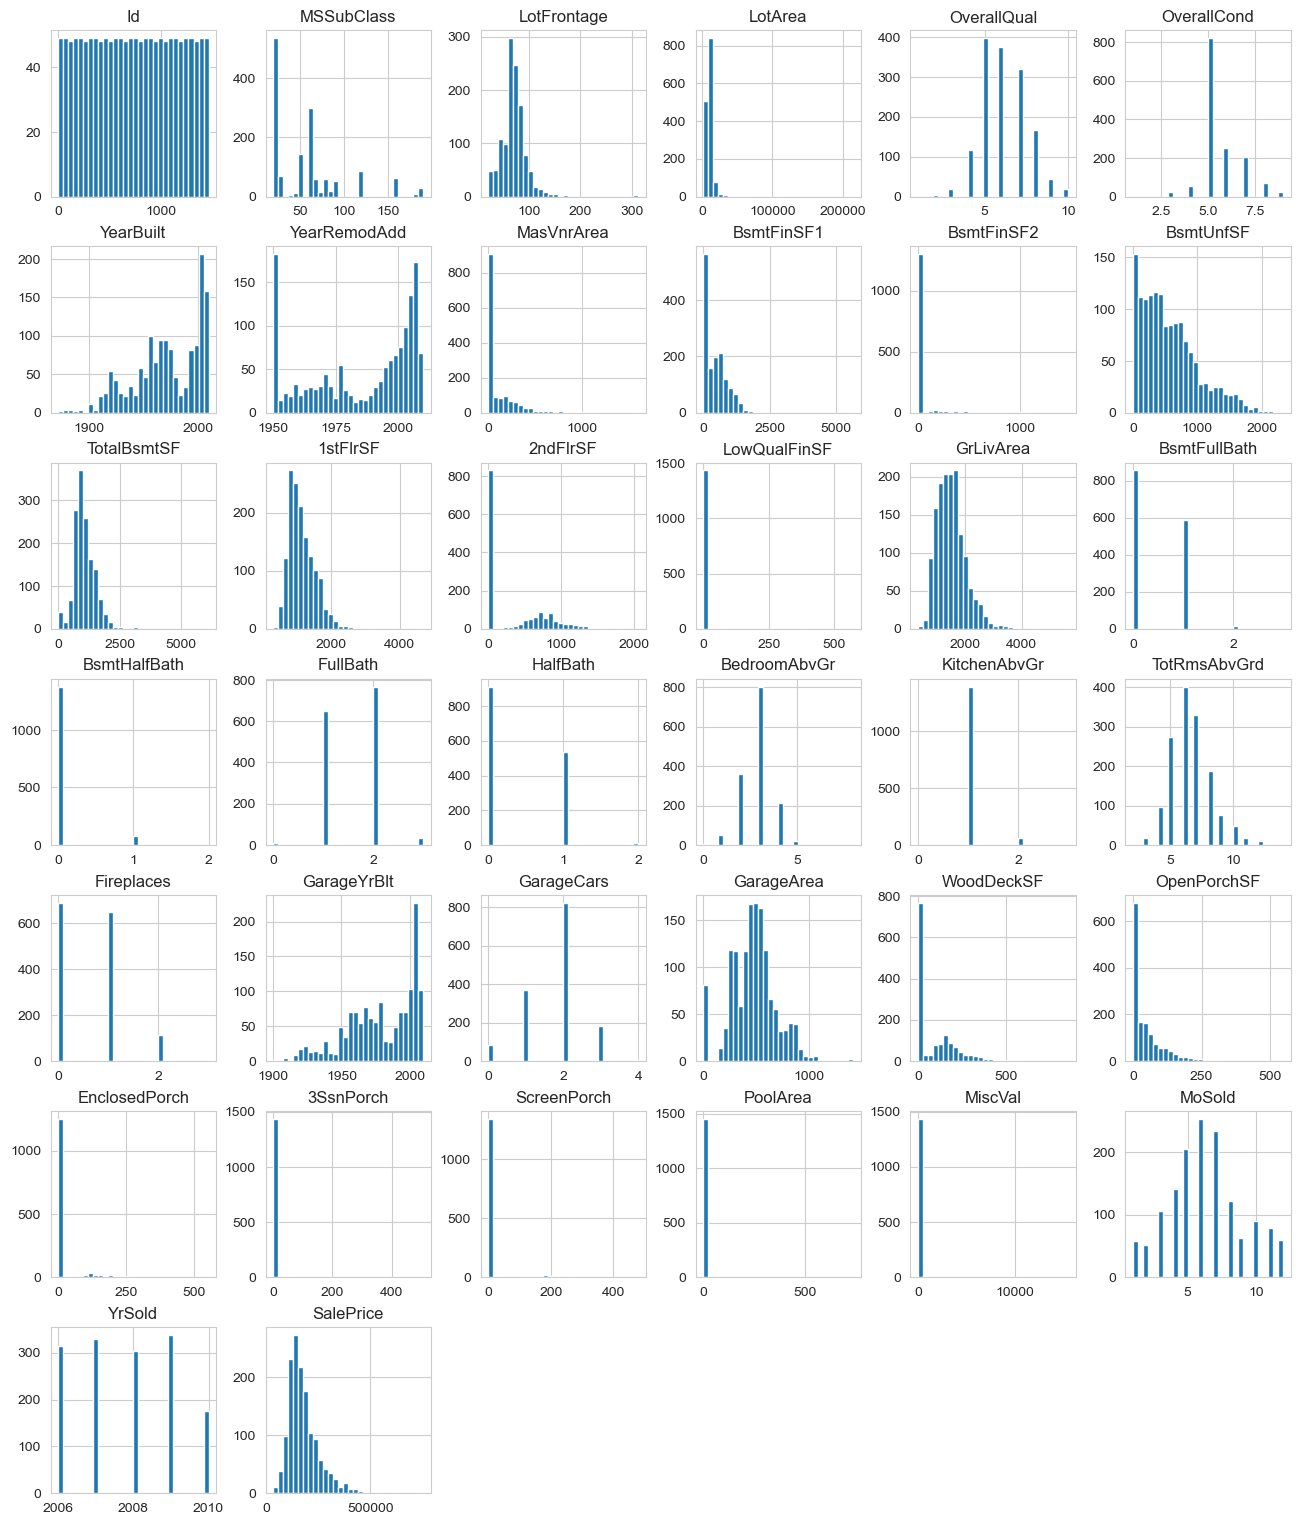

In [151]:
df_train_num.hist(figsize=(16,19), bins=30);

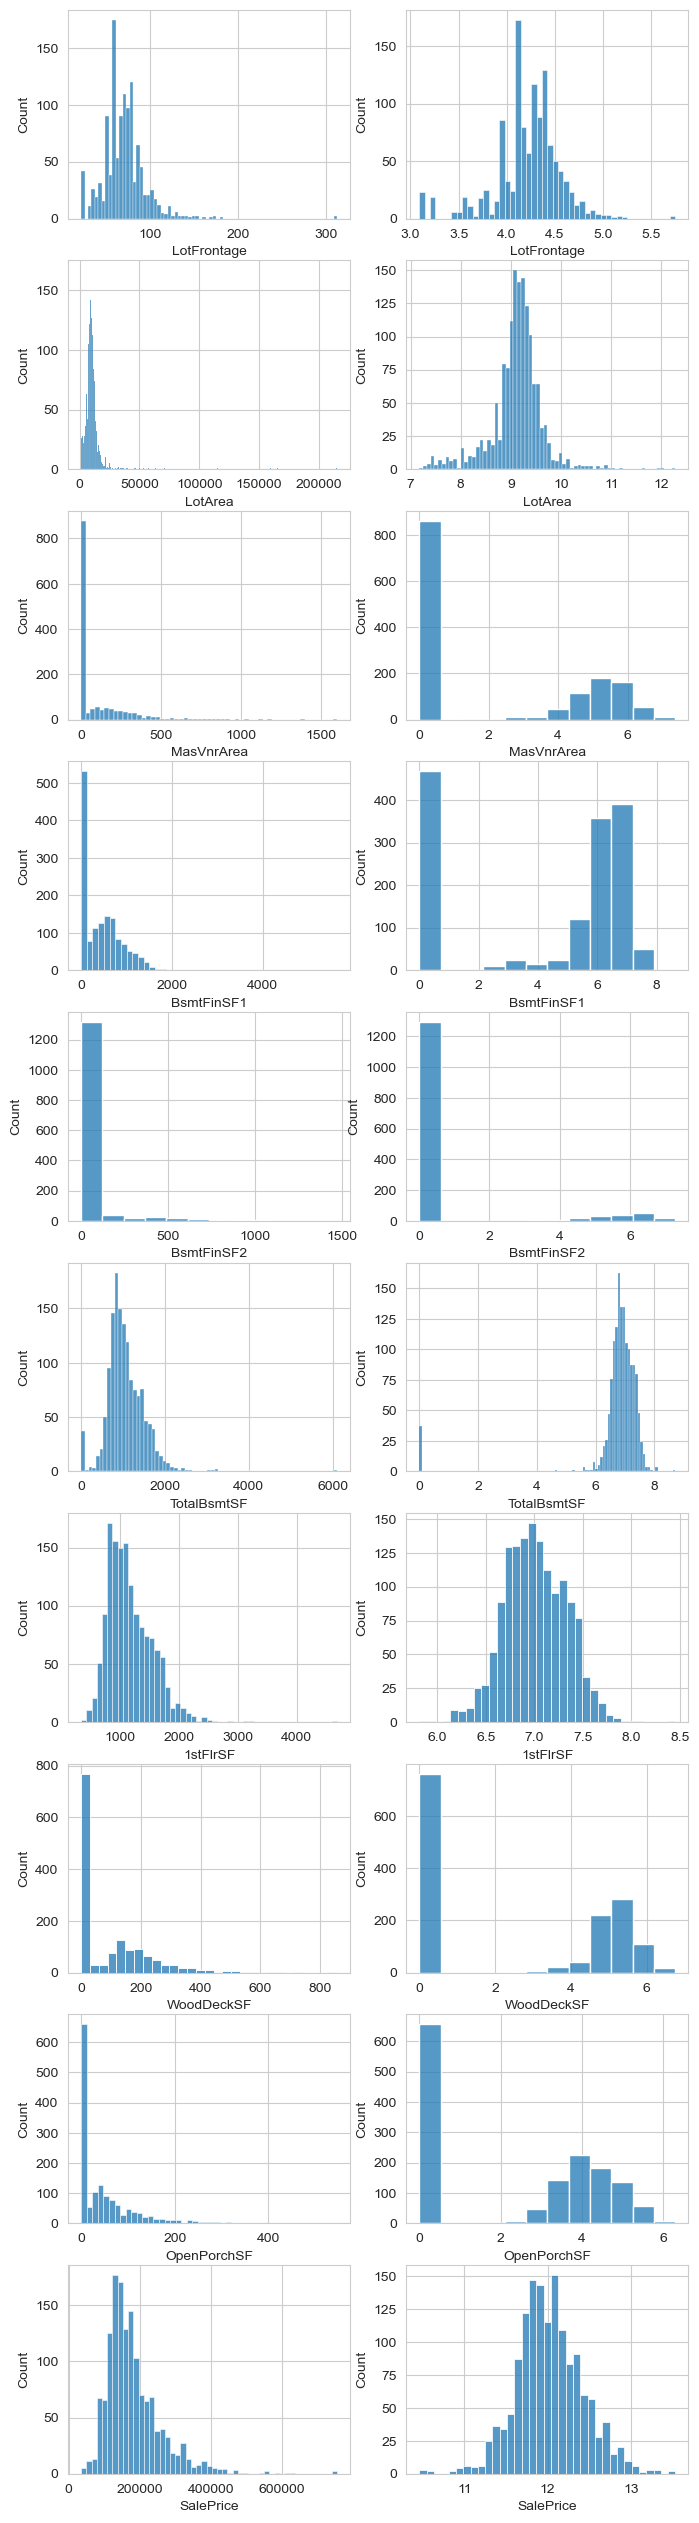

In [152]:
log_cols=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','WoodDeckSF','OpenPorchSF','SalePrice']

fig, axes=plt.subplots(10,2, figsize=(8,32));

j=0

for i in log_cols:
    sns.histplot(df_train[i], ax=axes[j,0]);
    log=np.log1p(df_train[i])
    sns.histplot(data=df_train,x=log, ax=axes[j,1]);
    j+=1

In [153]:
NaN_values=pd.DataFrame()
NaN_values['Quantity']=df_train.isna().sum()
NaN_values['DataType']=df_train.dtypes
NaN_values['Rate %']=(NaN_values['Quantity']/len(df_train)*100).round(2)
NaN_values[NaN_values['Quantity']>0]#.sort_values(by='Rate %', ascending=False)

,Quantity,DataType,Rate %
LotFrontage,259,float64,17.74
Alley,1369,object,93.77
MasVnrType,872,object,59.73
MasVnrArea,8,float64,0.55
BsmtQual,37,object,2.53
BsmtCond,37,object,2.53
BsmtExposure,38,object,2.60
BsmtFinType1,37,object,2.53
BsmtFinType2,38,object,2.60
Electrical,1,object,0.07


We can't just drop the columns with a high rate (NaN instances/total instances) because in some of them these NaN-Values have information. They usually mean the absence of the characteristic associated with the feature.

In [154]:
none_cols=['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC', 'Fence', 'MiscFeature']

#median_cols=['LotFrontage','MasVnrArea']
#mode_cols=['Electrical']

In [155]:
df_train[none_cols]

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,NaN,BrkFace,Gd,TA,No,GLQ,Unf,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN
1,NaN,NaN,Gd,TA,Gd,ALQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
2,NaN,BrkFace,Gd,TA,Mn,GLQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
3,NaN,NaN,TA,Gd,No,ALQ,Unf,Gd,Detchd,Unf,TA,TA,NaN,NaN,NaN
4,NaN,BrkFace,Gd,TA,Av,GLQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,NaN,Gd,TA,No,Unf,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
1456,NaN,Stone,Gd,TA,No,ALQ,Rec,TA,Attchd,Unf,TA,TA,NaN,MnPrv,NaN
1457,NaN,NaN,TA,Gd,No,GLQ,Unf,Gd,Attchd,RFn,TA,TA,NaN,GdPrv,Shed
1458,NaN,NaN,TA,TA,Mn,GLQ,Rec,NaN,Attchd,Unf,TA,TA,NaN,NaN,NaN


In [156]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline

none_imputer= SimpleImputer(strategy='constant', fill_value='None')
median_imputer= SimpleImputer(strategy='median')
mode_imputer= SimpleImputer(strategy='most_frequent')

#imputer_transformer=ColumnTransformer(
    #transformers=[
        #('impute_as_none', none_imputer, none_cols),
        #('impute_with_median', median_imputer, median_cols),
        #('impute_with_mode', mode_imputer, mode_cols)
    #],
    #remainder='passthrough' #This is very important!
#)

In [157]:
#df_train_imputed=imputer_transformer.fit_transform(df_train)
#df_train_imputed

In [158]:
log_cols=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','WoodDeckSF','OpenPorchSF']


none_cols=['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
           'GarageFinish','GarageQual','GarageCond','PoolQC', 'Fence', 'MiscFeature']

all_num_cols = df_train.select_dtypes(include=np.number).drop(columns=['Id', 'SalePrice']).columns

all_cat_cols = df_train.select_dtypes(include='object').columns

num_cols_no_log = list(set(all_num_cols) - set(log_cols))

cat_cols = list(set(all_cat_cols) - set(none_cols))


In [159]:
sum([len(log_cols),len(none_cols),len(num_cols_no_log),len(cat_cols)])

79

In [160]:
len(df_train.columns)

81

In [161]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

log_transformer = FunctionTransformer(np.log1p, inverse_func=np.expm1,feature_names_out='one-to-one')
scaler= StandardScaler()
onehot= OneHotEncoder(handle_unknown='ignore',sparse_output=False)

no_log_pipeline=make_pipeline(
    median_imputer,
    scaler
    )

log_pipeline=make_pipeline(
    median_imputer,
    log_transformer,
    scaler
    )

cat_pipeline=make_pipeline(
    mode_imputer,
    onehot
)

none_pipeline=make_pipeline(
    none_imputer,
    onehot
)

In [162]:

complete_transformer=ColumnTransformer(
    transformers=[
        ('no_log',no_log_pipeline, num_cols_no_log),
        ('log', log_pipeline, log_cols),
        ('categorical', cat_pipeline, cat_cols),
        ('none', none_pipeline, none_cols),
    ],
    remainder='passthrough' #This is very important!
)

In [163]:
df_train_prepared=complete_transformer.fit_transform(df_train)

feature_names=complete_transformer.get_feature_names_out()

X=pd.DataFrame(
    df_train_prepared,
    columns=feature_names,
    index=df_train.index
)

X

,no_log__3SsnPorch,no_log__FullBath,no_log__OverallCond,no_log__GarageCars,no_log__TotRmsAbvGrd,no_log__MiscVal,no_log__KitchenAbvGr,no_log__BsmtHalfBath,no_log__MoSold,no_log__GarageArea,...,none__Fence_MnPrv,none__Fence_MnWw,none__Fence_None,none__MiscFeature_Gar2,none__MiscFeature_None,none__MiscFeature_Othr,none__MiscFeature_Shed,none__MiscFeature_TenC,remainder__Id,remainder__SalePrice
0,-0.116339,0.789741,-0.517200,0.311725,0.912210,-0.087688,-0.211454,-0.241061,-1.599111,0.351000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,208500.0
1,-0.116339,0.789741,2.179628,0.311725,-0.318683,-0.087688,-0.211454,3.948809,-0.489110,-0.060731,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,181500.0
2,-0.116339,0.789741,-0.517200,0.311725,-0.318683,-0.087688,-0.211454,-0.241061,0.990891,0.631726,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,223500.0
3,-0.116339,-1.026041,-0.517200,1.650307,0.296763,-0.087688,-0.211454,-0.241061,-1.599111,0.790804,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,140000.0
4,-0.116339,0.789741,-0.517200,1.650307,1.527656,-0.087688,-0.211454,-0.241061,2.100892,1.698485,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.116339,0.789741,-0.517200,0.311725,0.296763,-0.087688,-0.211454,-0.241061,0.620891,-0.060731,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1456.0,175000.0
1456,-0.116339,0.789741,0.381743,0.311725,0.296763,-0.087688,-0.211454,-0.241061,-1.599111,0.126420,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1457.0,210000.0
1457,-0.116339,0.789741,3.078570,-1.026858,1.527656,4.953112,-0.211454,-0.241061,-0.489110,-1.033914,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1458.0,266500.0
1458,-0.116339,-1.026041,0.381743,-1.026858,-0.934130,-0.087688,-0.211454,-0.241061,-0.859110,-1.090059,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1459.0,142125.0


In [164]:
from sklearn.model_selection import train_test_split

X_raw=df_train.drop(columns=['Id', 'SalePrice'])
Y_raw=df_train['SalePrice']

(X_train_raw,X_val_raw,y_train_raw,y_val_raw)=train_test_split(X_raw, Y_raw, test_size=0.2)

In [165]:
X_train=complete_transformer.fit_transform(X_train_raw)
X_val=complete_transformer.transform(X_val_raw)

y_train=np.log1p(y_train_raw)
y_val=np.log1p(y_val_raw)

In [166]:
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.metrics import root_mean_squared_error,r2_score

alphas_to_test=[10, 15, 20, 25, 30]

ridge_cv_model = RidgeCV(alphas=alphas_to_test, cv=5)

ridge_cv_model.fit(X_train, y_train)

print(f'Best aplha found: {ridge_cv_model.alpha_}')

val_predictions = ridge_cv_model.predict(X_val)

rmse = (root_mean_squared_error(np.expm1(y_val), np.expm1(val_predictions)))
r2 = r2_score(np.expm1(y_val), np.expm1(val_predictions))


print(f'RMSE: {rmse:.2f} ,R2: {r2:.2f}')

Best aplha found: 15
RMSE: 20851.52 ,R2: 0.91


In [167]:
results_dict=[]

df_results=pd.DataFrame({})

def adding_results(rmse,r2,ModelName):
    results_dict.append({
        'Model':ModelName,
        'RMSE': rmse,
        'R2': r2
        })

adding_results(rmse,r2,'RigeCV')

df_results = pd.DataFrame(results_dict).set_index('Model').round(2)

df_results

,RMSE,R2
Model,,
RigeCV,20851.52,0.91


<Axes: >

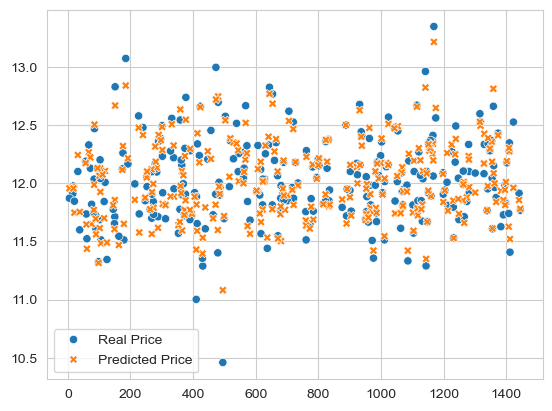

In [168]:
df_graph=pd.DataFrame({
    'Real Price': y_val,
    'Predicted Price': val_predictions
})

sns.scatterplot(data=df_graph)

In [169]:
from sklearn.model_selection import cross_val_predict, KFold

y_raw_log=np.log1p(Y_raw)

best_model=Ridge(alpha=10)

master_pipeline = Pipeline([
    ('preprocessor', complete_transformer),
    ('model', best_model)
])

cv_strategy = KFold(n_splits=10, shuffle=True)

log_predictions = cross_val_predict(
    master_pipeline,
    X_raw,
    y_raw_log,
    cv=cv_strategy,
    n_jobs=-1
)

y_dollars_true = np.expm1(y_raw_log)
y_dollars_pred = np.expm1(log_predictions)

dollar_rmse_scores = []

for train_index, val_index in cv_strategy.split(X_raw):
    fold_y_true = y_dollars_true.iloc[val_index]
    
    fold_y_pred = y_dollars_pred[val_index]
    
    fold_rmse = root_mean_squared_error(fold_y_true, fold_y_pred)
    dollar_rmse_scores.append(fold_rmse)

dollar_rmse_scores = np.array(dollar_rmse_scores)

print("\n--- Cross-Validation Results (in DOLLARS) ---")
print(f"Scores ($RMSE): {np.round(dollar_rmse_scores, 2)}")
print(f"Mean ($RMSE):   ${dollar_rmse_scores.mean():,.2f}")
print(f"Std Dev ($RMSE):  ${dollar_rmse_scores.std():,.2f}")
print(f"\n95% Confidence Interval ($RMSE): [${dollar_rmse_scores.mean() - 2*dollar_rmse_scores.std():,.2f}, ${dollar_rmse_scores.mean() + 2*dollar_rmse_scores.std():,.2f}]")


--- Cross-Validation Results (in DOLLARS) ---
Scores ($RMSE): [21269.67 22453.78 22562.43 80284.88 24386.86 20361.55 23578.61 25235.87
 25214.22 44589.33]
Mean ($RMSE):   $30,993.72
Std Dev ($RMSE):  $17,695.39

95% Confidence Interval ($RMSE): [$-4,397.05, $66,384.49]


In [170]:
onehot= OneHotEncoder(handle_unknown='ignore',sparse_output=False)

no_log_imp_pipeline=make_pipeline(
    median_imputer,
    )

log_imp_pipeline=make_pipeline(
    median_imputer,
    )

cat_imp_pipeline=make_pipeline(
    mode_imputer,
    onehot
)

none_imp_pipeline=make_pipeline(
    none_imputer,
    onehot
)

imp_1HE_transformer=ColumnTransformer(
    transformers=[
        ('no_log',no_log_imp_pipeline, num_cols_no_log),
        ('log', log_imp_pipeline, log_cols),
        ('categorical', cat_imp_pipeline, cat_cols),
        ('none', none_imp_pipeline, none_cols),
    ],
    remainder='passthrough' #This is very important!
)

In [175]:
from sklearn.ensemble import RandomForestRegressor

rf_reg=RandomForestRegressor(n_estimators=100, max_depth=10,random_state=42)

imp_1HE_pipeline = Pipeline([
    ('preprocessor', imp_1HE_transformer),
    ('model', rf_reg)
])

cv_strategy = KFold(n_splits=10, shuffle=True,random_state=42)

log_predictions = cross_val_predict(
    imp_1HE_pipeline,
    X_raw,
    y_raw_log,
    cv=cv_strategy,
    n_jobs=-1
)

y_dollars_true = np.expm1(y_raw_log)
y_dollars_pred = np.expm1(log_predictions)

dollar_rmse_scores = []

for train_index, val_index in cv_strategy.split(X_raw):
    fold_y_true = y_dollars_true.iloc[val_index]
    
    fold_y_pred = y_dollars_pred[val_index]
    
    fold_rmse = root_mean_squared_error(fold_y_true, fold_y_pred)
    dollar_rmse_scores.append(fold_rmse)



dollar_rmse_scores = np.array(dollar_rmse_scores)

print("\n--- Cross-Validation Results (in DOLLARS) WITH LOG_TARGET ---")
print(f"Scores ($RMSE): {np.round(dollar_rmse_scores, 2)}")
print(f"Mean ($RMSE):   ${dollar_rmse_scores.mean():,.2f}")
print(f"Std Dev ($RMSE):  ${dollar_rmse_scores.std():,.2f}")
print(f"\n95% Confidence Interval ($RMSE): [${dollar_rmse_scores.mean() - 2*dollar_rmse_scores.std():,.2f}, ${dollar_rmse_scores.mean() + 2*dollar_rmse_scores.std():,.2f}]")


--- Cross-Validation Results (in DOLLARS) WITH LOG_TARGET ---
Scores ($RMSE): [32099.82 27547.31 19574.58 31000.01 40952.49 32861.5  32413.04 26633.62
 25892.98 21842.07]
Mean ($RMSE):   $29,081.74
Std Dev ($RMSE):  $5,834.40

95% Confidence Interval ($RMSE): [$17,412.94, $40,750.54]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rf_reg=RandomForestRegressor()

param_dist={
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, 30],
    'model__min_samples_leaf':[1, 5, 7, 10],
    'model__max_features':['sqrt', 1.0]
}

cv_strategy = KFold(n_splits=10, shuffle=True, random_state=42)

rf_random_search= RandomizedSearchCV(
    estimator=imp_1HE_pipeline,
    param_distributions=param_dist,
    n_iter=10,
    cv=cv_strategy,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

rf_random_search.fit(X_raw, y_raw_log)

print(f'Best parameters:{rf_random_search.best_params_}')

best_model=rf_random_search.best_estimator_

log_predictions = cross_val_predict(
    best_model,
    X_raw,
    y_raw_log,
    cv=cv_strategy,
    n_jobs=-1
)

y_dollars_true = np.expm1(y_raw_log)
y_dollars_pred = np.expm1(log_predictions)

dollar_rmse_scores = []

for train_index, val_index in cv_strategy.split(X_raw):
    fold_y_true = y_dollars_true.iloc[val_index]
    
    fold_y_pred = y_dollars_pred[val_index]
    
    fold_rmse = root_mean_squared_error(fold_y_true, fold_y_pred)
    dollar_rmse_scores.append(fold_rmse)



dollar_rmse_scores = np.array(dollar_rmse_scores)

print("\n--- Cross-Validation Results (in DOLLARS) WITH LOG_TARGET ---")
print(f"Scores ($RMSE): {np.round(dollar_rmse_scores, 2)}")
print(f"Mean ($RMSE):   ${dollar_rmse_scores.mean():,.2f}")
print(f"Std Dev ($RMSE):  ${dollar_rmse_scores.std():,.2f}")
print(f"\n95% Confidence Interval ($RMSE): [${dollar_rmse_scores.mean() - 2*dollar_rmse_scores.std():,.2f}, ${dollar_rmse_scores.mean() + 2*dollar_rmse_scores.std():,.2f}]")


Best parameters:{'model__n_estimators': 200, 'model__min_samples_leaf': 1, 'model__max_features': 1.0, 'model__max_depth': 20}

--- Cross-Validation Results (in DOLLARS) ---
Scores ($RMSE): [31744.75 26919.2  20221.19 32472.71 40758.66 32568.83 33030.26 26380.48
 26071.22 21353.76]
Mean ($RMSE):   $29,152.11
Std Dev ($RMSE):  $5,847.30

95% Confidence Interval ($RMSE): [$17,457.50, $40,846.71]


If we use Y_raw for the fit:
The model's loss function (RMSE) will be dominated by the few, super-expensive houses. An error of $50k on a $700k house is massively penalized compared to a $10k error on a $150k house.

If we use y_raw_log:
This "pulls in" the outliers and focuses the model on percentage error. A 10% error ($15k) on a $150k house is treated similarly to a 10% error ($70k) on a $700k house. This often forces the model to build a more "balanced" set of rules that works better for the vast majority of the data.


In [176]:
from sklearn.ensemble import RandomForestRegressor

rf_reg=RandomForestRegressor(n_estimators=100, max_depth=10,random_state=42)

imp_1HE_pipeline = Pipeline([
    ('preprocessor', imp_1HE_transformer),
    ('model', rf_reg)
])

cv_strategy = KFold(n_splits=10, shuffle=True,random_state=42)

predictions = cross_val_predict(
    imp_1HE_pipeline,
    X_raw,
    Y_raw,
    cv=cv_strategy,
    n_jobs=-1
)

dollar_rmse_scores = []

for train_index, val_index in cv_strategy.split(X_raw):
    fold_y_true = Y_raw.iloc[val_index]
    
    fold_y_pred = predictions[val_index]
    
    fold_rmse = root_mean_squared_error(fold_y_true, fold_y_pred)
    dollar_rmse_scores.append(fold_rmse)



dollar_rmse_scores = np.array(dollar_rmse_scores)

print("\n--- Cross-Validation Results (in DOLLARS) ---")
print(f"Scores ($RMSE): {np.round(dollar_rmse_scores, 2)}")
print(f"Mean ($RMSE):   ${dollar_rmse_scores.mean():,.2f}")
print(f"Std Dev ($RMSE):  ${dollar_rmse_scores.std():,.2f}")
print(f"\n95% Confidence Interval ($RMSE): [${dollar_rmse_scores.mean() - 2*dollar_rmse_scores.std():,.2f}, ${dollar_rmse_scores.mean() + 2*dollar_rmse_scores.std():,.2f}]")


--- Cross-Validation Results (in DOLLARS) ---
Scores ($RMSE): [31404.05 28164.89 19902.09 29828.8  40146.6  38158.4  30920.24 26494.93
 25571.72 21441.73]
Mean ($RMSE):   $29,203.35
Std Dev ($RMSE):  $6,135.87

95% Confidence Interval ($RMSE): [$16,931.61, $41,475.08]


In [179]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rf_reg=RandomForestRegressor()

param_dist={
    'model__n_estimators': randint(100, 400),
    'model__max_depth': [8, 10, 12, 15, 20, None],
    'model__min_samples_leaf':[1, 2, 4, 6],
    'model__max_features':['sqrt', 1.0, 0.5]
}

cv_strategy = KFold(n_splits=10, shuffle=True, random_state=42)

rf_random_search= RandomizedSearchCV(
    estimator=imp_1HE_pipeline,
    param_distributions=param_dist,
    n_iter=50,
    cv=cv_strategy,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

rf_random_search.fit(X_raw, Y_raw)

print(f'Best parameters:{rf_random_search.best_params_}')

best_model=rf_random_search.best_estimator_

predictions = cross_val_predict(
    best_model,
    X_raw,
    Y_raw,
    cv=cv_strategy,
    n_jobs=-1
)

dollar_rmse_scores = []

for train_index, val_index in cv_strategy.split(X_raw):
    fold_y_true = Y_raw.iloc[val_index]
    
    fold_y_pred = predictions[val_index]
    
    fold_rmse = root_mean_squared_error(fold_y_true, fold_y_pred)
    dollar_rmse_scores.append(fold_rmse)



dollar_rmse_scores = np.array(dollar_rmse_scores)

print("\n--- Cross-Validation Results (in DOLLARS)")
print(f"Scores ($RMSE): {np.round(dollar_rmse_scores, 2)}")
print(f"Mean ($RMSE):   ${dollar_rmse_scores.mean():,.2f}")
print(f"Std Dev ($RMSE):  ${dollar_rmse_scores.std():,.2f}")
print(f"\n95% Confidence Interval ($RMSE): [${dollar_rmse_scores.mean() - 2*dollar_rmse_scores.std():,.2f}, ${dollar_rmse_scores.mean() + 2*dollar_rmse_scores.std():,.2f}]")

Best parameters:{'model__max_depth': 15, 'model__max_features': 0.5, 'model__min_samples_leaf': 1, 'model__n_estimators': 367}

--- Cross-Validation Results (in DOLLARS)
Scores ($RMSE): [30778.4  27108.91 18818.92 29324.09 39950.67 33881.42 30604.72 25597.15
 24049.94 19563.15]
Mean ($RMSE):   $27,967.74
Std Dev ($RMSE):  $6,093.44

95% Confidence Interval ($RMSE): [$15,780.86, $40,154.62]


GRADIENT BOOSTING

In [198]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg=GradientBoostingRegressor(n_estimators=400, learning_rate=0.1, random_state=42)

imp_1HE_pipeline = Pipeline([
    ('preprocessor', imp_1HE_transformer),
    ('model', gb_reg)
])

cv_strategy = KFold(n_splits=10, shuffle=True,random_state=42)

log_predictions = cross_val_predict(
    imp_1HE_pipeline,
    X_raw,
    y_raw_log,
    cv=cv_strategy,
    n_jobs=-1
)

print(f'optimal n_estimators: {gb_reg.n_estimators}')

y_dollars_true = np.expm1(y_raw_log)
y_dollars_pred = np.expm1(log_predictions)

dollar_rmse_scores = []

for train_index, val_index in cv_strategy.split(X_raw):
    fold_y_true = y_dollars_true.iloc[val_index]
    
    fold_y_pred = y_dollars_pred[val_index]
    
    fold_rmse = root_mean_squared_error(fold_y_true, fold_y_pred)
    dollar_rmse_scores.append(fold_rmse)



dollar_rmse_scores = np.array(dollar_rmse_scores)

print("\n--- Cross-Validation Results (in DOLLARS) WITH LOG_TARGET ---")
print(f"Scores ($RMSE): {np.round(dollar_rmse_scores, 2)}")
print(f"Mean ($RMSE):   ${dollar_rmse_scores.mean():,.2f}")
print(f"Std Dev ($RMSE):  ${dollar_rmse_scores.std():,.2f}")
print(f"\n95% Confidence Interval ($RMSE): [${dollar_rmse_scores.mean() - 2*dollar_rmse_scores.std():,.2f}, ${dollar_rmse_scores.mean() + 2*dollar_rmse_scores.std():,.2f}]")

optimal n_estimators: 400

--- Cross-Validation Results (in DOLLARS) WITH LOG_TARGET ---
Scores ($RMSE): [32475.43 27148.89 15862.91 24272.27 40186.97 22645.3  28778.42 21502.28
 23126.27 18386.83]
Mean ($RMSE):   $25,438.56
Std Dev ($RMSE):  $6,727.08

95% Confidence Interval ($RMSE): [$11,984.39, $38,892.73]


In [197]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

gb_reg=GradientBoostingRegressor()

param_dist={
    'model__n_estimators': [100, 200, 300, 400, 500],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__max_depth':[3, 5, 7],
    'model__subsample':[0.7, 0.8, 0.9, 1.0]
}

cv_strategy = KFold(n_splits=10, shuffle=True, random_state=42)

rf_random_search= RandomizedSearchCV(
    estimator=imp_1HE_pipeline,
    param_distributions=param_dist,
    n_iter=25,
    cv=cv_strategy,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

rf_random_search.fit(X_raw, y_raw_log)

print(f'Best parameters:{rf_random_search.best_params_}')

best_model=rf_random_search.best_estimator_

log_predictions = cross_val_predict(
    best_model,
    X_raw,
    y_raw_log,
    cv=cv_strategy,
    n_jobs=-1
)

y_dollars_true = np.expm1(y_raw_log)
y_dollars_pred = np.expm1(log_predictions)

dollar_rmse_scores = []

for train_index, val_index in cv_strategy.split(X_raw):
    fold_y_true = y_dollars_true.iloc[val_index]
    
    fold_y_pred = y_dollars_pred[val_index]
    
    fold_rmse = root_mean_squared_error(fold_y_true, fold_y_pred)
    dollar_rmse_scores.append(fold_rmse)



dollar_rmse_scores = np.array(dollar_rmse_scores)

print("\n--- Cross-Validation Results (in DOLLARS) WITH LOG_TARGET ---")
print(f"Scores ($RMSE): {np.round(dollar_rmse_scores, 2)}")
print(f"Mean ($RMSE):   ${dollar_rmse_scores.mean():,.2f}")
print(f"Std Dev ($RMSE):  ${dollar_rmse_scores.std():,.2f}")
print(f"\n95% Confidence Interval ($RMSE): [${dollar_rmse_scores.mean() - 2*dollar_rmse_scores.std():,.2f}, ${dollar_rmse_scores.mean() + 2*dollar_rmse_scores.std():,.2f}]")

Best parameters:{'model__subsample': 0.7, 'model__n_estimators': 500, 'model__max_depth': 3, 'model__learning_rate': 0.05}

--- Cross-Validation Results (in DOLLARS) WITH LOG_TARGET ---
Scores ($RMSE): [30755.31 25780.84 17304.96 33090.6  40975.37 20427.73 28324.12 23414.32
 21402.16 16302.65]
Mean ($RMSE):   $25,777.81
Std Dev ($RMSE):  $7,284.40

95% Confidence Interval ($RMSE): [$11,209.00, $40,346.61]
